# Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

# Attribute Information:
 - ID : Customer ID
 - Age : Customer's age in completed years
 - Experience : #years of professional experience
 - Income : Annual income of the customer (\\$000)
 - ZIP Code : Home Address ZIP code.
 - Family : Family size of the customer
 - CCAvg : Avg. spending on credit cards per month (\\$000)
 - Education : Education Level. 
     - 1: Undergrad 
     - 2: Graduate 
     - 3: Advanced/Professional
 - Mortgage : Value of house mortgage if any. (\\$000)
 - Personal Loan : Did this customer accept the personal loan offered in
the last campaign?
 - Securities Account : Does the customer have a securities account with
the bank?
 - CD Account : Does the customer have a certificate of deposit
(CD) account with the bank?
 - Online : Does the customer use internet banking facilities?
 - Credit card : Does the customer use a credit card issued by Tera Bank?

# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

# 1. Preliminary Steps:
Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)


In [1]:
### Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
### libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from scipy import stats

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy

from sklearn import preprocessing

**Comment** : Numpy, pandas, matplotlib, seaborn, scipy for EDA and Data Visualization, sklearn for data spliting, model building and confusion matrix.

In [3]:
### Import the datasets
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Comment** : Since 'Personal Loan' is the target variable, I'd like to place that at the end for user friendly reability in table format

In [4]:
### Target Column rearrange:
personal_loan = data['Personal Loan']
data.drop(['Personal Loan'], axis=1, inplace = True)
data['Personal Loan'] = personal_loan
data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


**Comment :** Now the traget column 'Personal Loan' is appended at the end of the dataframe.

In [5]:
### Checking number of raws and columns
data.shape

(5000, 14)

**Comment:**  There are 5000 rows and 14 columns in the dataset.

In [6]:
### check datatype
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

**Understanding the features from the above data types above :**
<br>
<br>

**Target variable :**<br>
• Target Variable is Personal Loan which describe whether the person has taken loan or not. This is the variable which we need to predict. <br>

**Remove unwanted variables :**<br>
• The ID variable can be ignored as it will not any effect on our model.It's just to maitain the record in serial order. <br>
•  The Zip code variable can also be ignored becasue we can not judge the customers based on thier area or location.<br>

**Ordinal Categorical variables :**<br>
• Family - Number of famlily member of the customer = should be ordinal<br>
• Education - Education level of the customer. In our dataset it ranges from 1 to 3 which are Under Graduate, Graduate and Post Graduate respectivly = should be ordinal<br>

**Integer Variables :**<br>
• Age - Age of the customer<br>
• Experience - Years of experience of customer has<br>
• Income - Annula Income of the customer which is in dollars<br>
• CCAvg - Avg. spending on credit cards per month which in dollars<br>
• Mortgage - Value of House Mortgage<br>
    
**Binary Categorical Variable :**<br>
• CD Account - Does the customer have CD Account with bank or not?<br>
• Security Account - Does the customer have Security Account with bank or not?<br>
• Online - Does the customer have Online banking facility with bank or not?<br>
• Credit Card - Does the customer have a credit card issued by Universal Bank or not?<br>
• Personal Loan - This our target variable which we have to predict. This indicates that the customer has token loan or not?<br>

In [7]:
### statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


**Comment:**<br>
* Strange that experience shows '-3' as minimum. Zero should be the minimum. You can't have -3 years of professional experience. Will need to investigate further.
* Binary varibales 'Personal Loan', 'Credit Card', 'Online', 'CD Account', 'Security Account' has clean data.
* Ordinary category variables 'Familty' and 'Education' are also clean.
* Target variable also looks fine.

* Average Age is 45 years
* 90% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
* Around 71% of the customer doesn’t use a credit card issued by UniversalBank.
* Around 60% of customers use internet banking facilities.
* Around 90% of the customer didn’t accept the personal loan offered in the last campaign.
* Around 90% of the customer don’t have a securities account with the bank.

In [8]:
### null values or incorrect imputation.
print(data.isnull().sum())

# check for na
print("\n")
print("*****check for na***** \n \n",  data.isna().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64


*****check for na***** 
 
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64


**Comment:** There are no missing value in the dataframe.

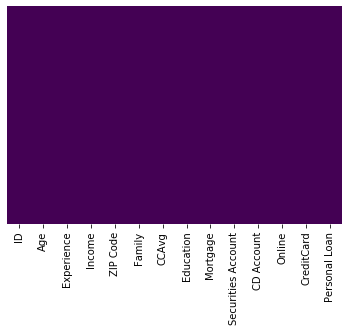

In [9]:
### Missing value visualisation:
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='viridis')

**Comment:** From the above heatmap graph we can see that there is no missing value in dataset.

# 2. EDA:
EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

## <a id = "link4"></a> Univariate Analysis

In [10]:
### number of unique in each column
pd.DataFrame(data.nunique(),columns=['total unique'])

,total unique
ID,5000
Age,45
Experience,47
Income,162
ZIP Code,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Securities Account,2


**Comments:**

* Loan_Amount_Term is categorical as it has only 10 unique values
* ID column has all unique values and it not a continous column so it has 5000 categories one for each row and that would not provide any info to the algorithm
* Family has 4 unique, so it would be 1,2,3,4
* All the categorial variables have two, which is correct i.e., 0 and 1

In [11]:
### number of people with zero mortgage
print ("Comment: Number of people with zero mortgage:", (data['Mortgage']==0).sum())

Comment: Number of people with zero mortgage: 3462


In [12]:
### number of people with zero credit card spending per month
print("Comment: Number of people with zero credit card spending per month:", (data['CCAvg']==0).sum())

Comment: Number of people with zero credit card spending per month: 106


In [13]:
### value counts of all categorical columns

for col in ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:
    print('\nColumn:', col)         # "\n" indicates new line
    print(data[col].value_counts())


Column: Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Column: Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

Column: Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64

Column: CD Account
0    4698
1     302
Name: CD Account, dtype: int64

Column: Online
1    2984
0    2016
Name: Online, dtype: int64

Column: CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64


**Comments:**

* Approx 10% of customers took a personal loan. We need to find out how to increase this.
* Certificate of deposit account is not a very popular type of savings account.
* Quite suprised to see a significant amount of customers do not use online banking.
* Majority of customers are under-grads.
* Majority of customers don't have a credit card.
* Quite a significant proportion of customers 

In [14]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = data['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


**Comments:**

* There is an imbalance in the data but no need to treat it as we do not want to create fake data

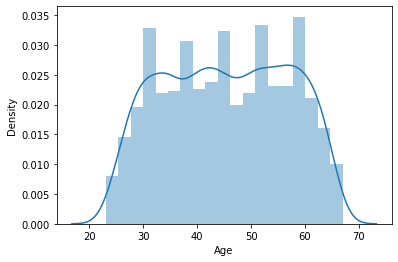

In [15]:
sns.distplot(data['Age'])

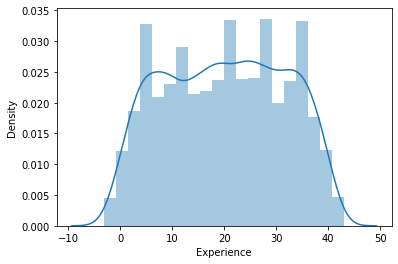

In [16]:
sns.distplot(data['Experience'])

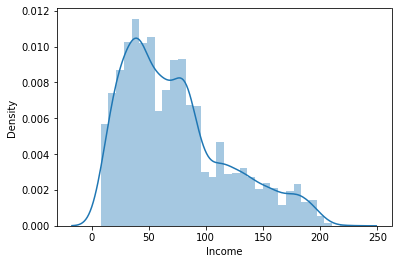

In [17]:
sns.distplot(data['Income'])

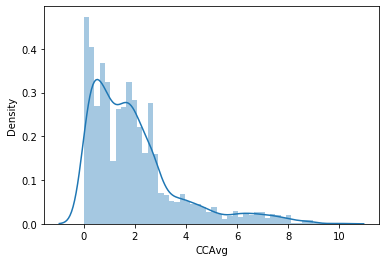

In [18]:
sns.distplot(data['CCAvg'])

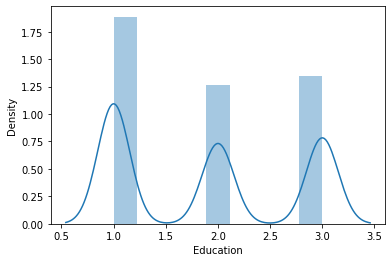

In [19]:
sns.distplot(data['Education'])

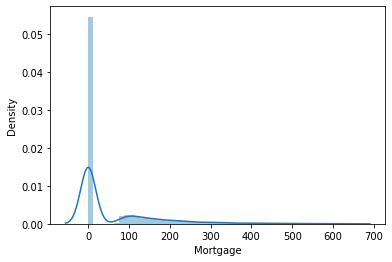

In [20]:
sns.distplot(data['Mortgage'])

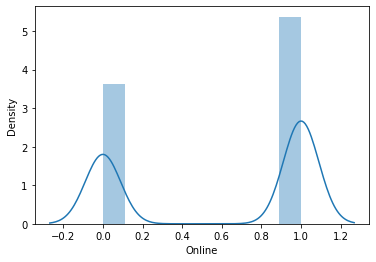

In [21]:
sns.distplot(data['Online'])

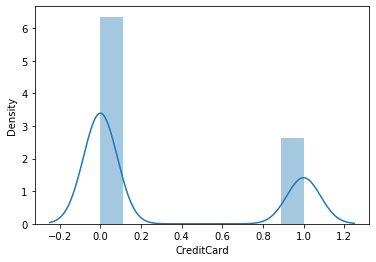

In [22]:
sns.distplot(data['CreditCard'])

**Comments:**<br>

• Age column is normaly distrubuted.<br>

• Experience is also normaly distributed.<br>

• Income distribution is right skewed distribution because the tail goes to the right.<br>

• CCAvg distribution is right skewed distribution because the tail goes to the right. Most of the customers monthly avg. spending on credit cards is between 1k to 2.5K. There are very few customers whose monthly avg. spending on credit card is more than 8k.<br>

• Undergrad level customers are more than the Graduate and Advanced/Professional customers.<br>

• Mortgage distribution is right skewed distribution because the tail goes to the right. Most of the customers do not have mortgage (represented by the longest line on zero). There are more customers whose mortgage amount is between  80000 to 150000 . Very few customers whos mortgage amount is more than 600000.<br>

• Online Account is a Bernoulli Distrubution. The Number of customers who have Online account is geater than the number of customers who do not have online account, but it's not huge.<br>

• Credit Card is a Bernoulli Distrubution. Number of customers without Credit Card is almost double than the number of customers with Credit Card.<br>

In [23]:
### Target variable observation:
loan_counts = pd.DataFrame(data["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


**Comments:** Approx 90% of customers did not apply for a personal loan in the previous campaign.

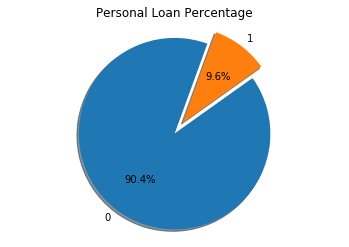

In [24]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

**Comment:** Out of 5000 data points, 4520 are labeled as 0 and 480 as 1. Percentage of customers who took loan is significantlly greater than customers who did not take loan.<br>

**Note:** There is a huge bias(almost 1:10) of people not accepting the personal loan. Hence we can build an opinion that our model will tends to perform better towards predicting which customers will not accept the personal loan. However, our goal is to identityfy the customer who can accept the personal loan based on the given features, hence there is no need to treat the imbalanced data with synthetice data or any other kind of algorithm.

## <a id = "link4"></a> Bivariate Analysis

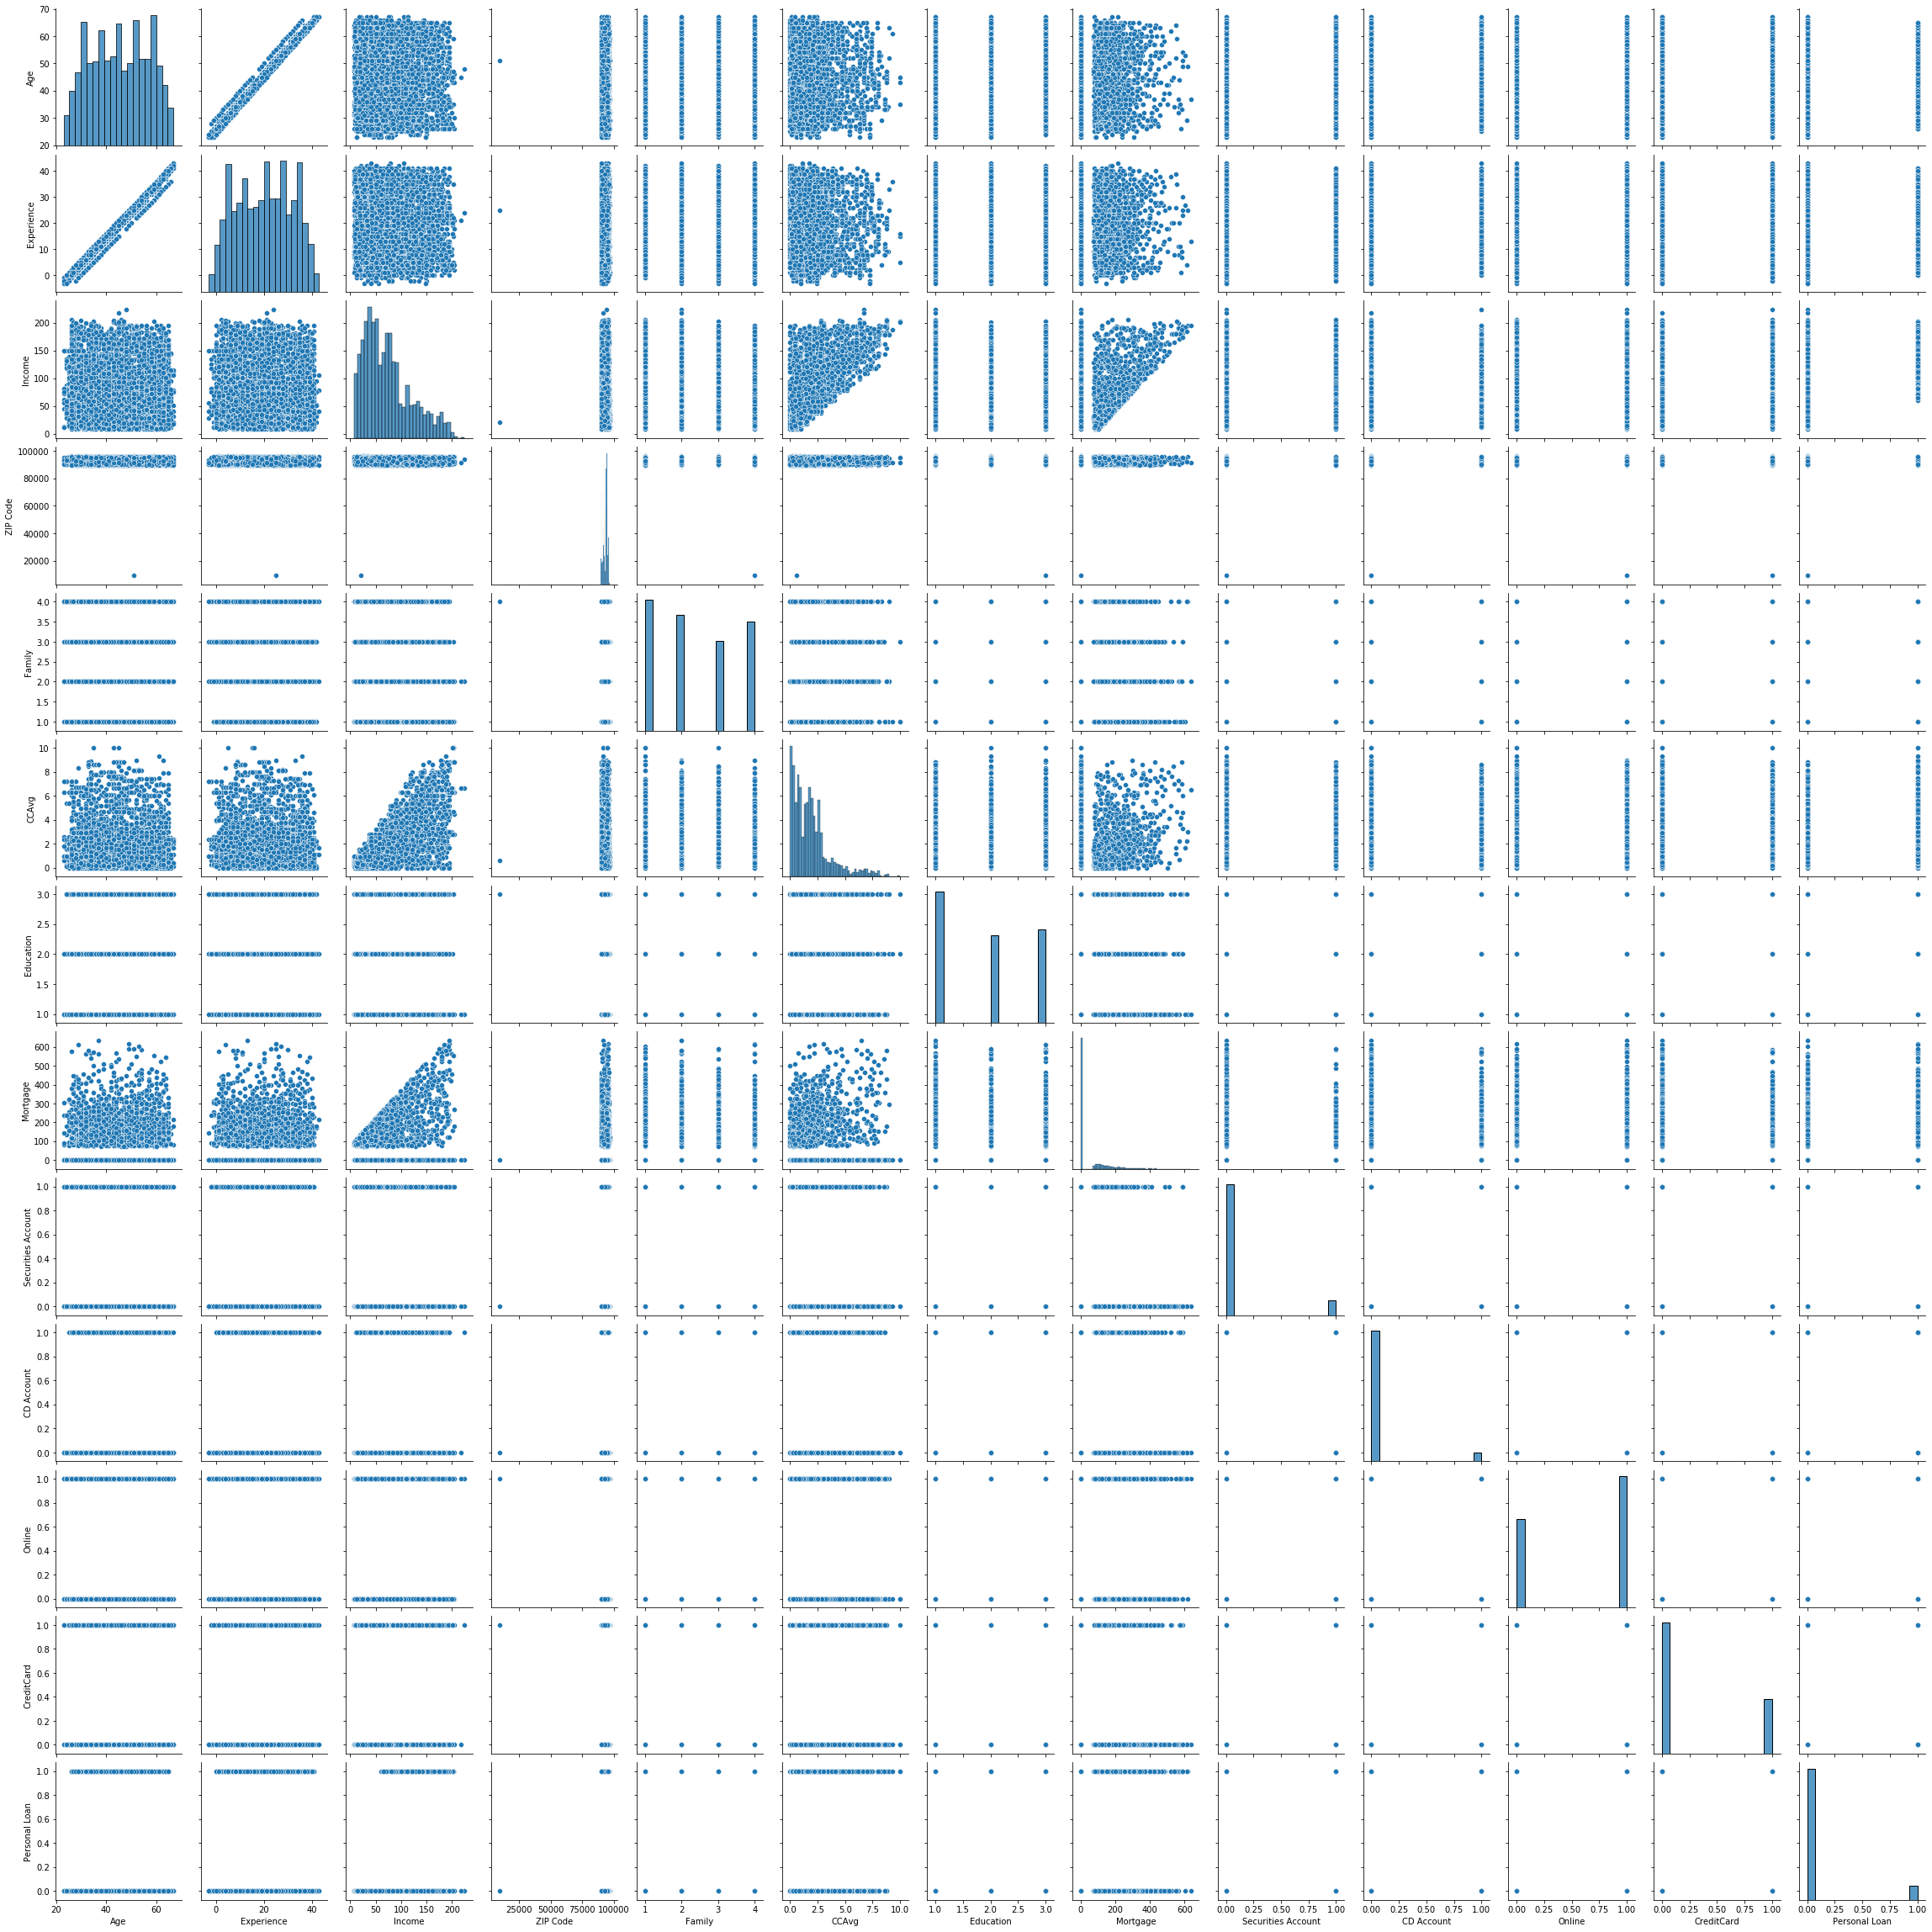

In [25]:
### Pair plot that includes all the columns of the data frame:
sns.pairplot(data.iloc[:,1:]) 

**Comment :** <br>

Although this Pairplot is not the easy on the eye to read, it does shows the following associations: <br>

* Age column is normally distributed. The mean and median is almost same which is similar to the transpose matrics. Most of the customers age are between 25 to 65 years.

* Experience is a normal distribution. Mean is almost equal to median.

* Experience and 'Age' are stong possitive associasion.

* Income is positively skewed and has outliers

* We dont see any relationship with the ZIP Code and other variables.

* Family and Education has low association with the 'Personal Loan'.

* The disribution of CCAvg is positively skewed. Majority of the customers average monthly spending is between 1k to 9k.

* Mortgage is positively skewed. Majority of the individuals have a mortgage of less than 40K.

In [26]:
data.groupby(data['Personal Loan']).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


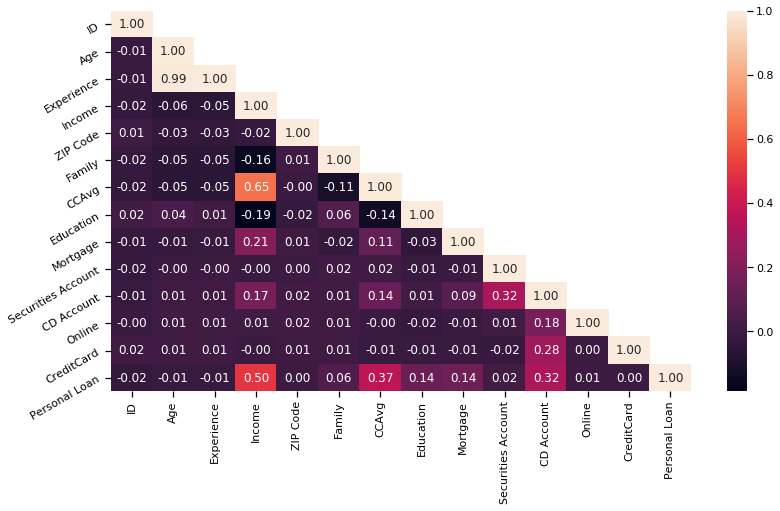

In [27]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

**Comment:** Target variabe 'Personal Loan ' has a strong correlation with CCAvg and Income.

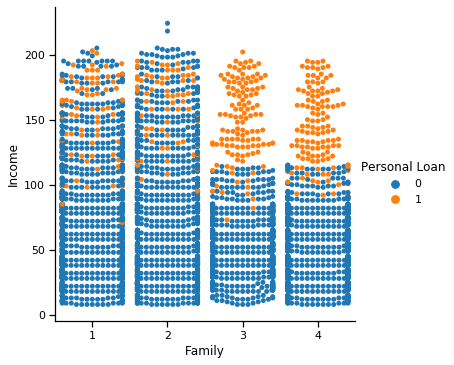

In [28]:
### Swarm Plot:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = data, kind='swarm')

**Comment:** Customers who have family size 3 or greater with higher income between 100k to 200k are more likely to take loan.

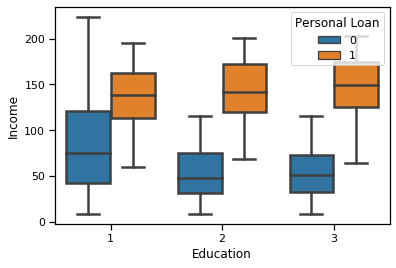

In [29]:
# Boxplots:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = data)

**Comment:** Undergraduate are customers more likely to accept a loan. Customer who took loan are in the same income range irrespective of education level. Graduates and above are more likely to take loan.

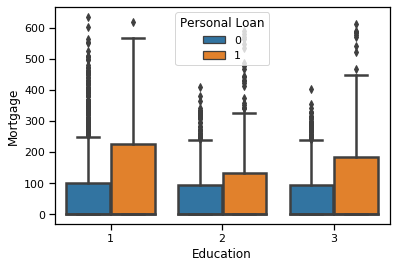

In [30]:
# Subplots:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data)

**Comment:** Undergraduates (Education level 1) who didn't take a loan have higher mortgage than customers who took a loan with same education level. Education level is 2 and 3 whom didn't take a loan has a lower mortgage than customers who took a loan with the same education level.

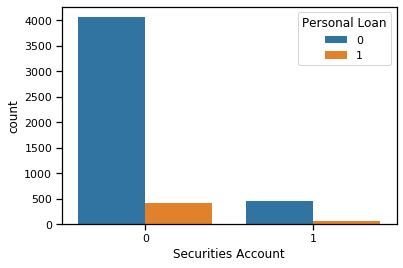

In [31]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

**Comment:** Customers who has securies account are more likly to take loan. Majority of customers who does not have loan do not have securities account.

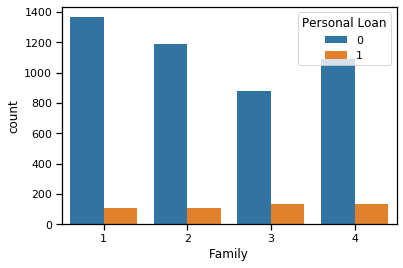

In [32]:
sns.countplot(x='Family',data=data,hue='Personal Loan')

**Comment:**  It seems families with size of 3 and 4 are more likely to take loan. But the differences in family size don't show that much of an impact on personal loan.

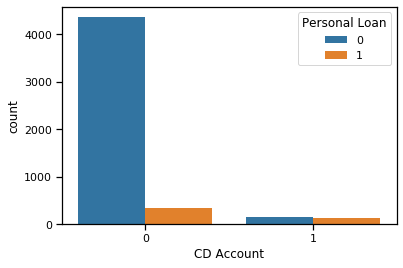

In [33]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan')

**Comment:** A low amount of customers who accepted a personal loan did not have a CD account, whereas almost all customers who has CD account accepted a personal loan too.

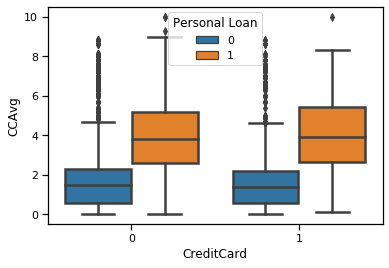

In [34]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=data)

**Comment:** Owning a credit card and not owning a credit doesn't show a significant impact on accepting a personal loan, however, higher CCAvg monthly spending does show that a customer is more likly to take a personal loan.

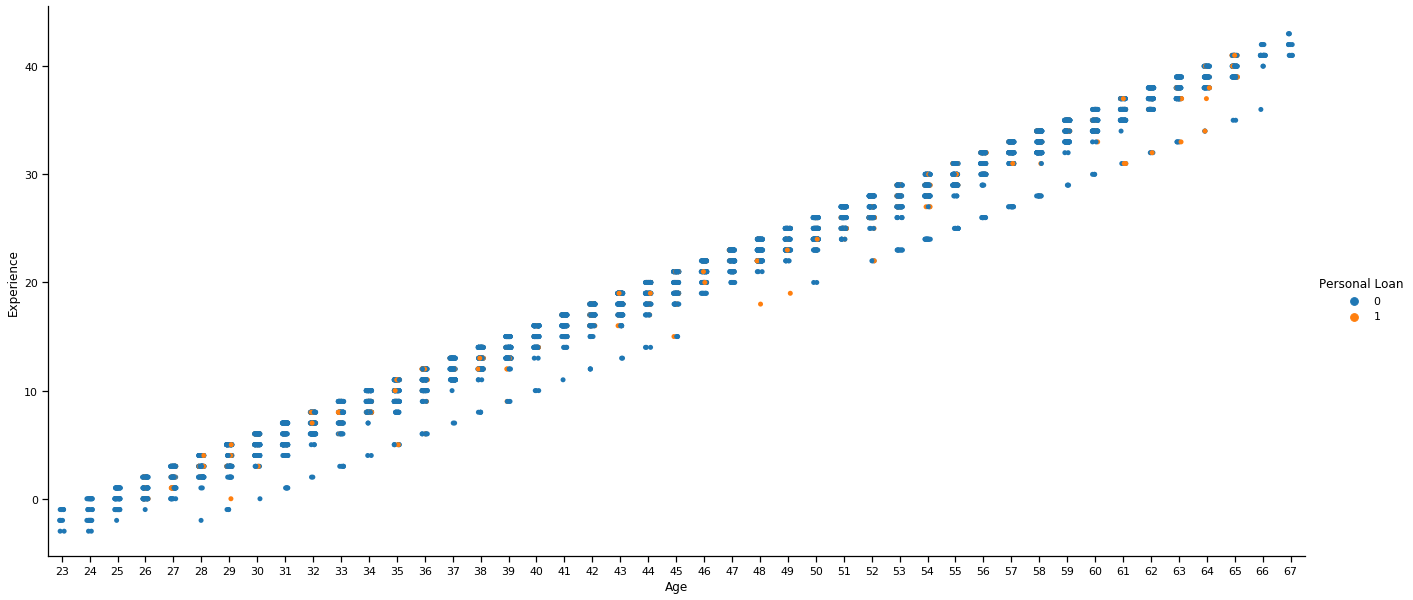

In [35]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', 
            data = data, height=8.27, aspect=11/5)

**Comment:** From the above we clearly see that Age and Experience have very storng association. As Age increases Experience also increases.

Text(0.5, 1.0, 'CCAvg Distribution')

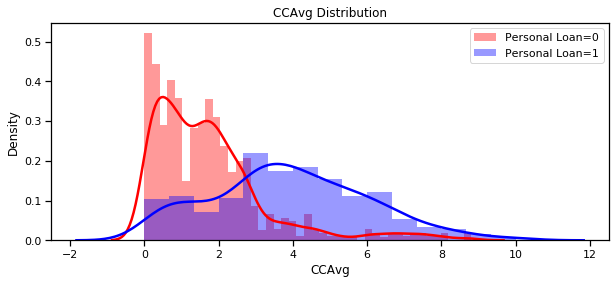

In [36]:
plt.figure(figsize=(10,4))
sns.distplot(data[data["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0')
sns.distplot(data[data["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

**Comment:** Customers who accepted a personal loan have higher monthly credit card averages than those who did not accept a personal loan. Therefore, high monthly credit card average seems to be good predictor of whether or not a customer will accept a personal loan.

In [37]:
print('Monthly Credit card spending of customers who did not accept a Peronsal Loan: ',
      data[data['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Monthly Credit card spending of customers who did accept a Peronsal Loan    : ', 
      data[data['Personal Loan'] == 1]['CCAvg'].median()*1000)

Monthly Credit card spending of customers who did not accept a Peronsal Loan:  1400.0
Monthly Credit card spending of customers who did accept a Peronsal Loan    :  3800.0


**Comment:** The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollars indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan.

Text(0.5, 1.0, 'Income Distribution')

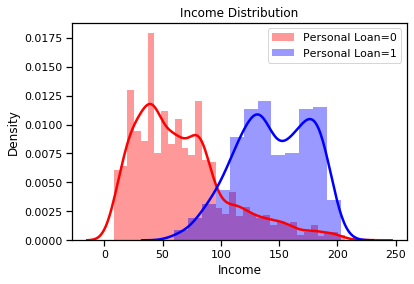

In [38]:
sns.distplot(data[data["Personal Loan"] == 0]['Income'], color = 'r',
             label='Personal Loan=0')
sns.distplot(data[data["Personal Loan"] == 1]['Income'], color = 'b',
             label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

**Comment** Customers who took a personal loan have a higher income than those who did not. Therefore, high income seems to be good predictor of whether or not a customer will take a personal loan.

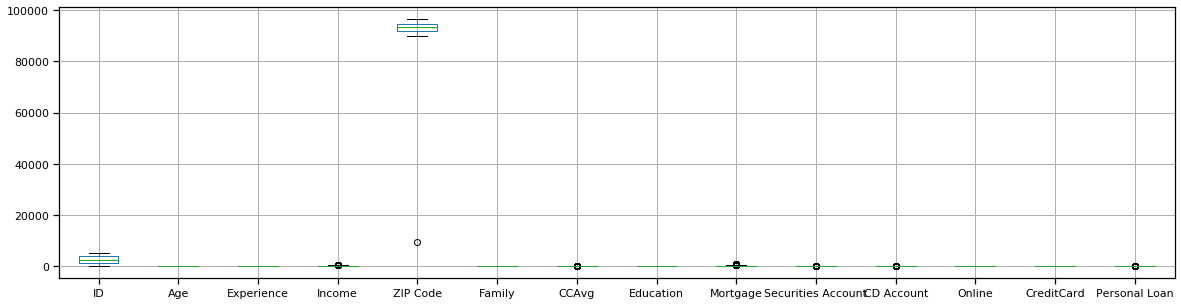

In [39]:
### Outliers:
data.boxplot(return_type='axes', figsize=(20,5))

**Comment:** Boxplot shows there are outliers on most colomns. In particular Mortgage has more outliers.

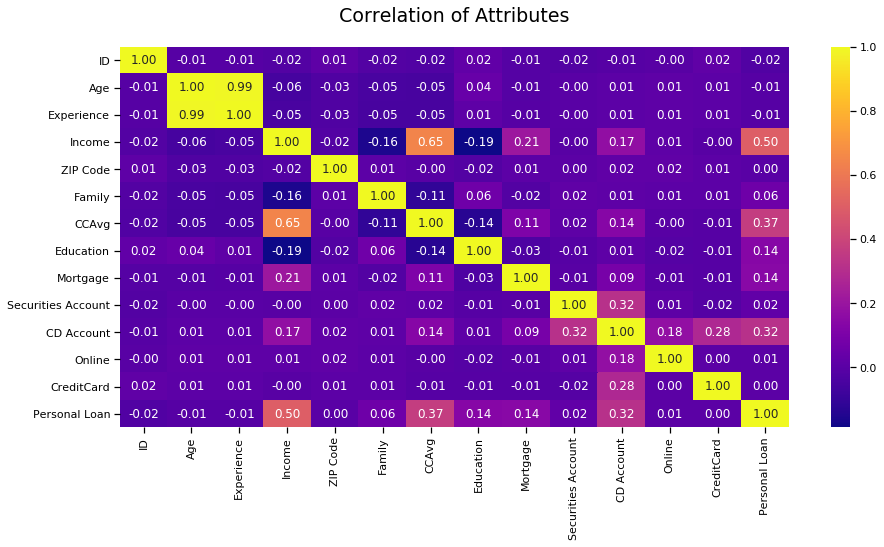

In [40]:
### Corrplot:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(data.corr(), cmap='plasma',annot=True, fmt='.2f')

**Comment:**

* Age and Experience are highly correlated; correlation is almost 1.
* 'Income' and 'CCAvg' is moderately correlated.
* Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
* 'CD Account' has a moderate association with 'Credit Card''  'Securities Account', 'Online', 'CCAvg' and 'Income'.
* 'Mortgage' has moderate correlation with 'Income' which is about 21%.
* 'Income' has influences on 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

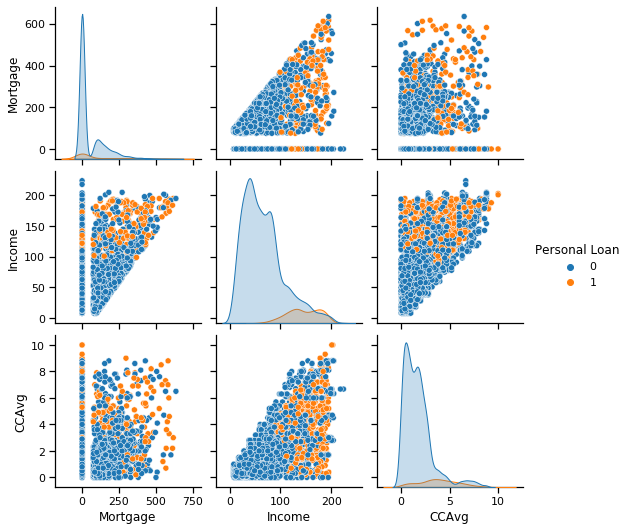

In [41]:
### Closer look at target variable 'Personal Loan' with other variables

### Pairplot:
sns.pairplot(data[['Mortgage', 'Income', 'CCAvg', 'Personal Loan']], hue = 'Personal Loan', diag_kind = 'kde');

**Comment:** 'Personal Loan ' has strong correlation with `CCAvg` and `Income`

### Getting data model ready

In [42]:
### Five point summary of  attributes and label :-
data_transpose = data.describe().T
data_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Securities Account,0.0,0.00,0.0,0.00,1.0


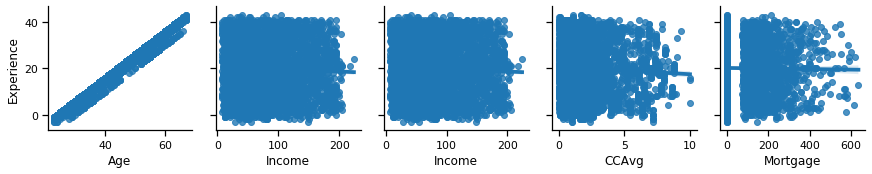

In [43]:
quantitiveVar = ['Age', 'Income', 'Income', 'CCAvg', 'Mortgage']
expGrid = sns.PairGrid(data, y_vars = 'Experience', x_vars = quantitiveVar)
expGrid.map(sns.regplot)

**Comment :** Important: Minumum value of Experience column is -3.0 which could be a mistake because Experience can not be negative. So I will be fixing this now.

In [44]:
### Fixing the 'Experience' column:

# Checking total negative values
data[data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [45]:
# Total records of negative experience
data[data['Experience'] < 0]['Experience'].count()

52

In [46]:
data_Possitive_Experience = data[data['Experience'] > 0]
data_Negative_Experience =  data[data['Experience'] < 0]
data_Negative_Experience_List = data_Negative_Experience['ID'].tolist()

for id in data_Negative_Experience_List:
    age_values = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education_values = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    possitive_Experience_Filtered = data_Possitive_Experience[(data_Possitive_Experience['Age'] == age_values) & (data_Possitive_Experience['Education'] == education_values)]
    if possitive_Experience_Filtered.empty :
        negative_Experience_Filtered = data_Negative_Experience[(data_Negative_Experience['Age'] == age_values) & (data_Negative_Experience['Education'] == education_values)]
        exp = round(negative_Experience_Filtered['Experience'].median())
    else:
        exp = round(possitive_Experience_Filtered['Experience'].median())
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = abs(exp)

**Comment:** Replace each negative 'Experience' value with the median of a positive 'Experience' associated with the particular 'Age' and 'Education' value. Because 'Education' is also strongly correlated with 'Age'

In [47]:
# All negative 'Experience' fixed
data[data['Experience'] < 0]['Experience'].count()

0

**Comment:** 

* There were 52 negative values in the original dataset, which were obviously incorrect because you can't have negative experience

* Then the pair plot showed a strong correlation between 'Experience' and 'Age', and we also know from previous EDA that 'Education' is closely related to 'Age'

* So, I replaced each negative 'Experience' value with the median of a positive 'Experience' associated with the particular 'Age' and 'Education' value. Because 'Education' is also strongly correlated with 'Age'

In [48]:
# drop ID and Zip Code
data.drop(columns ='ID',inplace=True)
data.drop(columns ='ZIP Code',inplace= True)

**Comment:** No need for these columns as they have no bearing on the dataset

# 3. Data Split:
Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [49]:
### Define X and Y variables - storing predictors and target in X and y variables

X = data.drop('Personal Loan', axis=1)
y= data['Personal Loan'] # target variable

In [50]:
### Split the data into train (70%) and test (30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=7)

**Comment:** 
* Dataset now split into training and testing sets, 70% and 30% respectively.
* Why we use random State: Sklearn randomly shuffles the data so we get a slightly different answer. If we fix the random state and re-run the code then all the scores will stay the same for that random state.
* If we do not use random state our metrics will slightly differ in every run.

# 4. Modelling with Logistic Regression:
Use Logistic Regression model to predict whether the customer will take personal loan or
not. Print all the metrics related for evaluating the model performance (15 marks)

In [62]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

### Creating logistic regression model
logreg = LogisticRegression(solver = 'liblinear',random_state=7)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**Comment:** Fit the model on train data

In [63]:
y_predict = logreg.predict(X_test) 

**Comment:**  Predicting the target variable on test data

In [64]:
### Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
3406,42,12,34,3,2.0,3,0,0,0,0,1,0,0
757,52,28,81,3,1.8,2,0,1,0,0,0,0,0
3624,58,28,70,1,1.4,3,0,0,0,0,0,0,0
4544,28,4,80,3,2.5,1,0,0,0,1,0,0,0
3235,60,35,39,2,1.6,3,0,0,0,1,0,0,0


In [65]:
# Evaluate model performance 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1362
           1       0.81      0.64      0.72       138

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



**Comment:** Overall, the model is scoring highly in all areas. But it is slightly weaker in predicting those accepted a personal loan (81%), than those that didn't (96%).

* Precision: ability of the classifier not to label as positive a sample that is negative, i.e., correct predictions out of total positive predictions. The model is quite good at predicting true negatives (96%), and not too bad as predicting true positives (81%).

* Recall: ability of the classifier to find all the positive samples. Best value is 1 and the worst value is 0. Again, the model is not that great at predicting all the customers whom accepted a perosnal loan. Only  64%.

* F1 score: weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 

* Accuracy of the model is high, 95%.

In [66]:
### function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9485714285714286

Testing accuracy 0.9533333333333334

Confusion Matrix


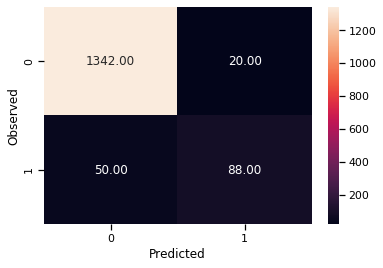

None

Recall: 0.6376811594202898

Precision: 0.8148148148148148

F1 Score: 0.7154471544715448

Roc Auc Score: 0.8114984358041243


In [67]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

**Comment:** The purpose of this project is to predict the likelihood of a liability customer buying personal loans. So the metrics we are looking for to be as high as possible are: Precision, Recall, F1 Score

* Precision: only looks at the data you predicted positive and out of those predicted positive, how many of them are actually positive. Here it is 81%, which is not bad. The economic cost of getting it wrong could be high and i.e., waste of marketing budget and on the wrong perona

* Recall: how many individuals were classified correctly out of all the actual positive individuals. (True Positive). Applying the same logic, it is important to have this figure as high as possible because identifying the wrong has high cost associated with false negatives. Here it is 63% - not that great

* F1 Score: a measure of a model's accuracy. It is calculated from combining the precision and recall, and defined as the harmonic mean of the model's precision and recall.

* Testing data accuracy is very high, 95%

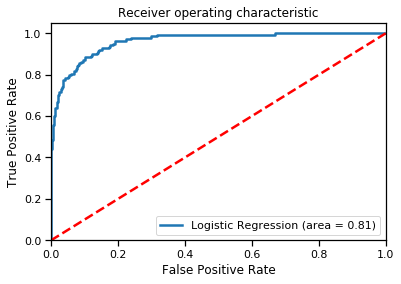

In [68]:
# !pip install yellowbrick

### AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Comment:** Roc Auc Score: 0.81%

*  It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, higher the AUC, better the model is at distinguishing between customers whom accepted the personal loan and those that didn't.

* Each data point on the blue line are the changes in probability and should be high if we want the precision to be high. In this graph it is quite good because the curve goes quite high before starting to bend at around the 81% True Positive Rate. The AUC is also quite high which is very good.

* 81% is not a bad model.

# 5. Model Parameters:
Check different parameters of Logistic Regression and give your reasoning whether the
model performance is affected due to it or not? (10 marks)

## Tuning the threshold at 50% cut-off

In [69]:
### These are the probabilities based on 50% threshold on test data
Threshold_50 = 0.50
logreg.predict_proba(X_test)

array([[9.98512110e-01, 1.48788959e-03],
       [9.53896023e-01, 4.61039773e-02],
       [9.94203945e-01, 5.79605537e-03],
       ...,
       [9.88994947e-01, 1.10050532e-02],
       [9.97088543e-01, 2.91145667e-03],
       [9.99854860e-01, 1.45140011e-04]])

In [71]:
### If the probability is greater than the threshold (50%), then it is '1' otherwise '0'
### '1' means that the customer accepted the personal loan
preds = np.where(logreg.predict_proba(X_test)[:,1]>Threshold_50, 1,0)
preds

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix


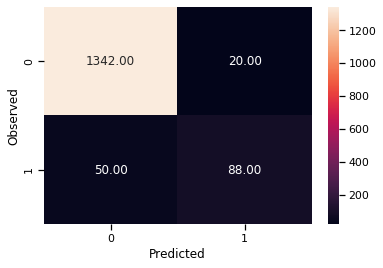

None

Recall: 0.6376811594202898

Precision: 0.8148148148148148

F1 Score: 0.7154471544715448

Roc Auc Score: 0.8114984358041243


In [72]:
print('Confusion Matrix')
print(draw_cm(y_test,preds))
print()
print("Recall:",recall_score(y_test,preds))
print()
print("Precision:",precision_score(y_test,preds))
print()
print("F1 Score:",f1_score(y_test,preds))
print()
print("Roc Auc Score:",roc_auc_score(y_test,preds))

**Comment:** We can play around with the cut-off threshold depending on the risk factors in play.

* with a threshold of 50%, we are essentially saying that anything above 50% is considered having accpeted a personal loan.

* here the 'true positives' were 133 customers out of 1500 in the test data we got correct

* however the 'false positives' were 262 customers that the model predicted incorrectly 

* the quesions is whether or not the Thera Bank can stomach the cost of incorrectly marketing to 262 people, or 17% of the overall dataset in order to capture 133 correctly identified customers whom will accept the personal loan?

* the answer is no, then we should increase the threshold to say 80% in order to minimise risk. However, that could mean that the model will incorrectly dismiss a lot of 'true positives'. (lets see what happens below)
    

## Tuning the threshold at 80% cut-off

In [73]:
### These are the probabilities based on 50% threshold on test data
Threshold_80 = 0.80
logreg.predict_proba(X_test)

array([[9.98512110e-01, 1.48788959e-03],
       [9.53896023e-01, 4.61039773e-02],
       [9.94203945e-01, 5.79605537e-03],
       ...,
       [9.88994947e-01, 1.10050532e-02],
       [9.97088543e-01, 2.91145667e-03],
       [9.99854860e-01, 1.45140011e-04]])

In [74]:
### If the probability is greater than the threshold (80%), then it is '1' otherwise '0'
### '1' means that the customer accepted the personal loan
preds = np.where(logreg.predict_proba(X_test)[:,1]>Threshold_80, 1,0)
preds

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix


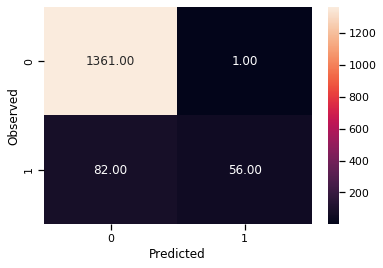

None

Recall: 0.4057971014492754

Precision: 0.9824561403508771

F1 Score: 0.5743589743589744

Roc Auc Score: 0.7025314435293367


In [75]:
print('Confusion Matrix')
print(draw_cm(y_test,preds))
print()
print("Recall:",recall_score(y_test,preds))
print()
print("Precision:",precision_score(y_test,preds))
print()
print("F1 Score:",f1_score(y_test,preds))
print()
print("Roc Auc Score:",roc_auc_score(y_test,preds))

**Comment:** As you can see, by raising the bar to 80%, we have only 1 'false positve', however, we have raised the bar so high that we can only capture a small amount of customers to fall within the 'true positives' i.e,. this would be a very conservative approach to risk.
<br><br>
Consequently, by changing the THRESHOLD to 0.80, one can find that Recall has gone down from 95% to 40%,  and the Precision scores has increased from 33% to 98%.


## Parameter tuning with solver algorithms

Checking Parameters of Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* This is an introduction to let you know that all the algorithms have parameters aand changing those parameters affects the model performance. How to regularize parameter is covered in FMST module.

* By changing a binary classifier parameter (the threshold for a logistic regression classifier), the precision and recall will also change

In [76]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Solvers options:** Solving logistic regression is an optimization problem. There are several solver algorithms we can use to test different parameters.

**ref: https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451**

Scikit-learn has five different solvers. Each solver tries to find the parameter weights that minimize a cost function. Here are the five options we will use:<br>

* newton-cg — A newton method. Newton methods use an exact Hessian matrix. It's slow for large datasets, because it computes the second derivatives.

* lbfgs — Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It approximates the second derivative matrix updates with gradient evaluations. It stores only the last few updates, so it saves memory. It isn't super fast with large data sets. It will be the default solver as of Scikit-learn version 0.22.0.

* liblinear — Library for Large Linear Classification. Uses a coordinate descent algorithm. Coordinate descent is based on minimizing a multivariate function by solving univariate optimization problems in a loop. In other words, it moves toward the minimum in one direction at a time. It is the default solver for Scikit-learn versions earlier than 0.22.0. It performs pretty well with high dimensionality. It does have a number of drawbacks. It can get stuck, is unable to run in parallel, and can only solve multi-class logistic regression with one-vs.-rest.

* sag — Stochastic Average Gradient descent. A variation of gradient descent and incremental aggregated gradient approaches that uses a random sample of previous gradient values. Fast for big datasets.

* saga — Extension of sag that also allows for L1 regularization. Should generally train faster than sag.

**The C parameter:** controls the penality strength, which can also be effective.<br>

C is the hyperparameter ruling the amount of regularisation in your model; see the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). <br>

Its inverse 1/C is called the regularisation strength in the doc. The larger C the less penalty for the parameters norm, l1 or l2. C cannot be set to 0 by the way, it has to be >0

In [1]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)   
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print("Solver     :", solver)
print()
print("Train score:", train_score)
print()
print("Test score :",test_score)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

NameError: name 'LogisticRegression' is not defined

**Comment:** All score pretty high on the test data; newton-cg is the highest (95%)

Solver     : ['liblinear', 'saga']

Train score: [0.951, 0.904]

Test score : [0.955, 0.916]

Confusion Matrix


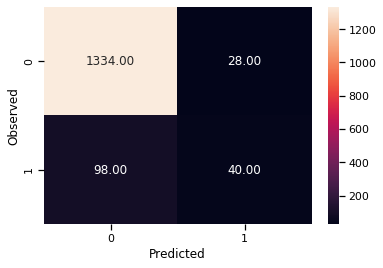

None

Recall: 0.2898550724637681

Precision: 0.5882352941176471

F1 Score: 0.38834951456310673

Roc Auc Score: 0.6346485347634553


In [78]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print("Solver     :", solver)
print()
print("Train score:", train_score)
print()
print("Test score :",test_score)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

**Comment:** changing the penalty strength to 11 with the two solvers 'liblinear' and 'saga' resulted in 'liblinear' achieving 95.5% accuracy

Trainig accuracy: 0.8934285714285715

Testing accuracy: 0.8893333333333333

Confusion Matrix


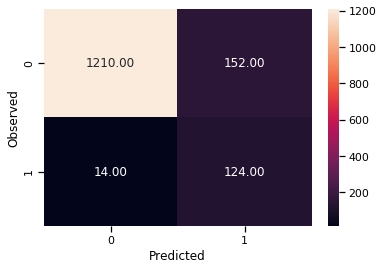

None

Recall: 0.8985507246376812

Precision: 0.4492753623188406

F1 Score: 0.5990338164251208

Roc Auc Score: 0.8934750686330845


In [79]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy:",model.score(X_train,y_train))  
print()
print("Testing accuracy:",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

Trainig accuracy: [0.868, 0.887, 0.892, 0.893, 0.893, 0.893]

Testing accuracy: [0.871, 0.886, 0.889, 0.891, 0.889, 0.889]

Confusion Matrix


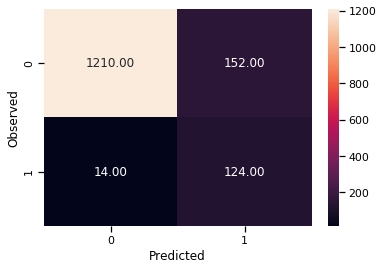

None

Recall: 0.8985507246376812

Precision: 0.4492753623188406

F1 Score: 0.5990338164251208

Roc Auc Score: 0.8934750686330845


In [80]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print("Trainig accuracy:",train_score)
print()
print("Testing accuracy:",test_score)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

**Comment:** When 'C' is at 0.5, the testing accuracy is the optimum at 89% (0.891) and this is what we shall say is the best parameters for tuning the logistic regression model.

Trainig accuracy 0.8928571428571429

Testing accuracy 0.8913333333333333

Confusion Matrix


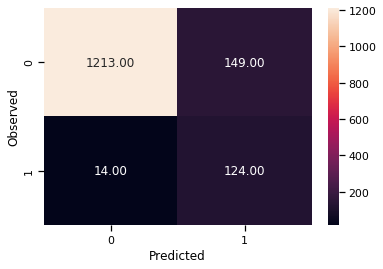

None

Recall: 0.8985507246376812

Precision: 0.4542124542124542

F1 Score: 0.6034063260340633

Roc Auc Score: 0.8945763902189875


In [81]:
### Therefore final best model is when C = 0.50 ....

model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.50) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

**Comment:** Therefore final best model is with the solver 'liblinear', with the paramenters: penalty='l1', class_weight='balanced', C=0.5

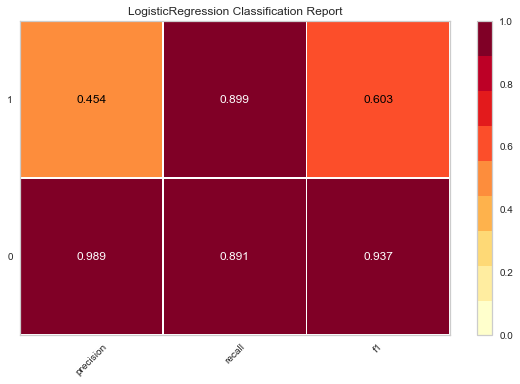

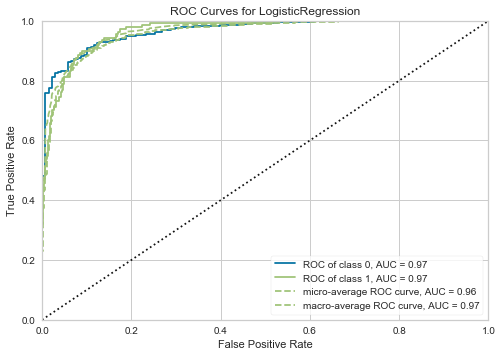

In [82]:
# !pip install yellowbrick

# Additional for visuals

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

**Comment:** Area Under the ROC curve<br>

* The Area Under the ROC curve (AUC) is an aggregated metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. It can range from 0.5 to 1, and the larger it is the better. People will sometimes use the AUC as a means for evaluating predictive performance of a model, although because it represents all possible cutoff values, which isn’t feasible in practice, and the interpretation is difficult. 


* The area under the curve is around 97%, much higher than any of the previously tuned models, which means that the logistic regression model is very good. The curve is almost like a 90 degree angle, hence easy to discriminate between the 0s and 1s

* Note that at every point, either sensitivity or specificity are at 97% (meaning 1-specificity is at 0%). In fact, this curve shows that there is a cutoff for which both sensitivity and specificity are at 97%. Another way to state this is that there are hardley any false positives and hardly any false negatives. Hence the AUC of this ROC curve is very good.




## <a id = "link5"></a>Bonus Content

Model building using Statsmodel.api

In [83]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.133272
         Iterations 9


**Comment:**<br>

* Logistic regression uses maximum likelihood, which is an iterative procedure.  The first iteration (called iteration 0) is the log likelihood of the “null” or “empty” model; that is, a model with no predictors. At the next iteration, the predictor(s) are included in the model.  At each iteration, the log likelihood increases because the goal is to maximize the log likelihood.  When the difference between successive iterations is very small,  the model is said to have “converged”, the iterating is stopped and the results are displayed.  


* Here the logit function has stopped at the 9th iteration and the values have converged at: 0.133272

In [84]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Thu, 05 Nov 2020   Pseudo R-squ.:                  0.5836
Time:                        19:53:26   Log-Likelihood:                -466.45
converged:                       True   LL-Null:                       -1120.1
Covariance Type:            nonrobust   LLR p-value:                1.182e-273
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.5470      1.872     -6.704      0.000     -16.215      -8.879
Age                   -0.0365      0.070     -0.523      0.601      -0.173       0.100
Experience          

**Comment:**

* Log likelihood: This is the log likelihood of the final model.  The value -466.45 has no meaning in and of itself; rather, this number can be used to help compare nested models.


* Pseudo R2 – This is the pseudo R-squared.  Logistic regression does not have an equivalent to the R-squared that is found in OLS regression; however, many people have tried to come up with one.  There are a wide variety of pseudo-R-square statistics.  Because this statistic does not mean what R-square means in OLS regression (the proportion of variance explained by the predictors), it is suggested we interpret this statistic with great caution.


* coef - The coefficient (or parameter estimate) for the variable CD Account is 3.6812.  This means that for a one-unit increase in CD Account we expect a 3.6812 increase in the log-odds of the dependent variable 'personal loan', holding all other independent variables constant. The same reasoning can be applied to all the other variables. In most cases, this is not interesting.  Also, often times zero is not a realistic value for a variable to take.


* Std. Err. – These are the standard errors associated with the coefficients.  The standard error is used for testing whether the parameter is significantly different from 0; by dividing the parameter estimate by the standard error you obtain a z-value (see the column with z-values and p-values). The standard errors can also be used to form a confidence interval for the parameter, as shown in the last two columns of this table.


*  z and P>|z| - These columns provide the z-value and 2-tailed p-value used in testing the null hypothesis that the coefficient (parameter) is 0.   If you use a 2-tailed test, then you would compare each p-value to your preselected value of alpha.  Coefficients having p-values less than alpha are statistically significant.  For example, if you chose alpha to be 0.05, coefficients having a p-value of 0.05 or less would be statistically significant (i.e., you can reject the null hypothesis and say that the coefficient is significantly different from 0). The null hypothesis in this case would be that the customer did not accept a 'personal loan'. If you use a 1-tailed test (i.e., you predict that the parameter will go in a particular direction), then you can divide the p-value by 2 before comparing it to your preselected alpha level.  With a 2-tailed test and alpha of 0.05, you may reject the null hypothesis that the coefficient for female is equal to 0. 



### Interpretation of Pseudo R^2

A pseudo R^2 of 17% indicates that 17% of the uncertainty of the intercept only model is explained by the full model

#### Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [85]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [86]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account,3.68,39.70,0.98,0.00
Education,1.68,5.38,0.84,0.00
Family,0.77,2.17,0.68,0.00
CCAvg,0.16,1.18,0.54,0.00
Income,0.05,1.05,0.51,0.00
Online,-0.59,0.55,0.36,0.00
Securities Account,-0.82,0.44,0.30,0.01
CreditCard,-1.18,0.31,0.23,0.00
const,-12.55,0.00,0.00,0.00


**Comment:**

* Odds of an event happening is defined as the likelihood that an event will occur, expressed as a proportion of the likelihood that the event will not occur. 


* Odds Ratio (OR) is a measure of association between exposure and an outcome. The OR represents the odds that an outcome will occur given a particular exposure, compared to the odds of the outcome occurring in the absence of that exposure.

# 6. Business Insights:
Give Business understanding of your model? (5 marks)

`Confusion matrix business interpretation`

* In the case of Therea Bank launching a campaign offering attractive personal loan packages, you would like to extend your package to as many potential loan payers as possible, while avoiding loaning out to potential defaulters, and also to minimise other cost such as cost of campaigning or cost of alienating existing customers with unequal treatment.

**False Positive (observed=0,predicted=1):**

* However, if False Positives are high, the bank would lose money. However, it could be argued that the bank is not worried about losing marketing budget because making a profit from the interest on a high number of personal loans is going to be more valuable in the long run than wasted advertising targetting the wrong type of customers.


* The model predicted and identified 273 potential hot prospects for buying a personal loan out of that 1500 people and that 124 of those hot leads actually ended up accepting a personal loan. That would mean a conversion rate of 45 percent. The conversion rate is actually the precision of the model. So for a high level management scenario, this explaination would be more familiar as to how the prediction can help the bank, i.e improving conversion rate. Now management can compare this metric to their current process, and our project now has clear business implications.

**Hence Precision is the important metric**.


* Suppose the focus is on targetting as many personal loan customers as possible. The prediction model does the same prediction: whether a visitor is going to accept a personal loan or not, and follow-ups are targeted towards these individuals.

The model manages to include 124 of these high value customers that is our target segment. That would mean a capture rate of 90% percent with regards to the  people that we are trying to target. Well, the 90 percent capture rate is actually the recall of the model! 

**Recall (Sensitivity/True Positive Rate) TP / TP + FN 124/124+14=90% (observed=0,predicted=1):**


* To put it simply, precision is the ability to get the highest ratio of conversions, recall is the ability to not miss out on those high value customers going to accept a peronal loan.

* Notice that, with different quality of targetting, the business focus becomes very different. In the first case, we are more interested in converting as many customers into buyers as possible with as little effort (Precision), whereas in the second case we aim to capture as many of the target segment as possible (Recall).



(A little note on accuracy)

* Although accuracy rates were very high, we know from the data that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed.



**THE END**

## Appendix:

- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **boxplot** : Draw a box plot to show distributions with respect to categories.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LogisticRegression** : Logistic Regression (aka logit, MaxEnt) classifier.

- **scipy.stats** : This module contains a large number of probability distributions as well as a growing library of statistical functions.

- **statsmodels** : It is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
    - An extensive list of result statistics are available for each estimator.
    - The results are tested against existing statistical packages to ensure that they are correct.
    - The online documentation is hosted at [statsmodels.org](https://www.statsmodels.org/stable/index.html).

- **yellowbrick** : Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it  uses Matplotlib